##### Installation/ importation des packages nécessaires 

In [1]:
pip install pandas numpy matplotlib ydata_profiling optuna seaborn scikit-learn plotly sweetviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12; 4.7.0 Requires-Python >=3.7, <3.13; 4.8.3 Requires-Python <3.13,>=3.7; 4.9.0 Requires-Python <3.13,>=3.7
ERROR: Could not find a version that satisfies the requirement ydata_profiling (from versions: n

In [2]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import nbformat

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  recall_score, f1_score, precision_score
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_classification

from scipy.stats import chi2_contingency

import optuna



c:\Users\nourn\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Récupération du dataset

In [4]:
df_satisfaction=pd.read_csv('df_satisfaction.csv')

In [5]:
df_satisfaction.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df_satisfaction.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# **EDA** 

##### Vue d'ensemble des données 

In [7]:
# Premières lignes du dataset
display(df_satisfaction.head())

# Taille du dataset
display(df_satisfaction.shape)

# Aperçu du dataset
display(df_satisfaction.info())


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


(129880, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

None

##### Statistiques

In [8]:
# Pour les colonnes numériques
display(df_satisfaction.describe())

# Pour les colonnes catégorielles
display(df_satisfaction.describe(include='object'))


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


##### Détection et suppression des valeurs manquantes

In [9]:
# Valeurs manquantes par colonne
print(df_satisfaction.isna().sum())


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [10]:
missing_percentage = df_satisfaction['Arrival Delay in Minutes'].isnull().mean() * 100
print(f"Pourcentage de valeurs manquantes dans 'Arrival Delay in Minutes' : {missing_percentage:.2f}%")

Pourcentage de valeurs manquantes dans 'Arrival Delay in Minutes' : 0.30%


In [12]:
df_clean_satisfaction= df_satisfaction.dropna()

###### La colonne n'a pas d'incidence et ne permet pas à aider à définir la satisfaction des passager, nous allons donc supprimer les valeurs nulles 

##### Analyses variées

- ###### Distribution des variables numériques

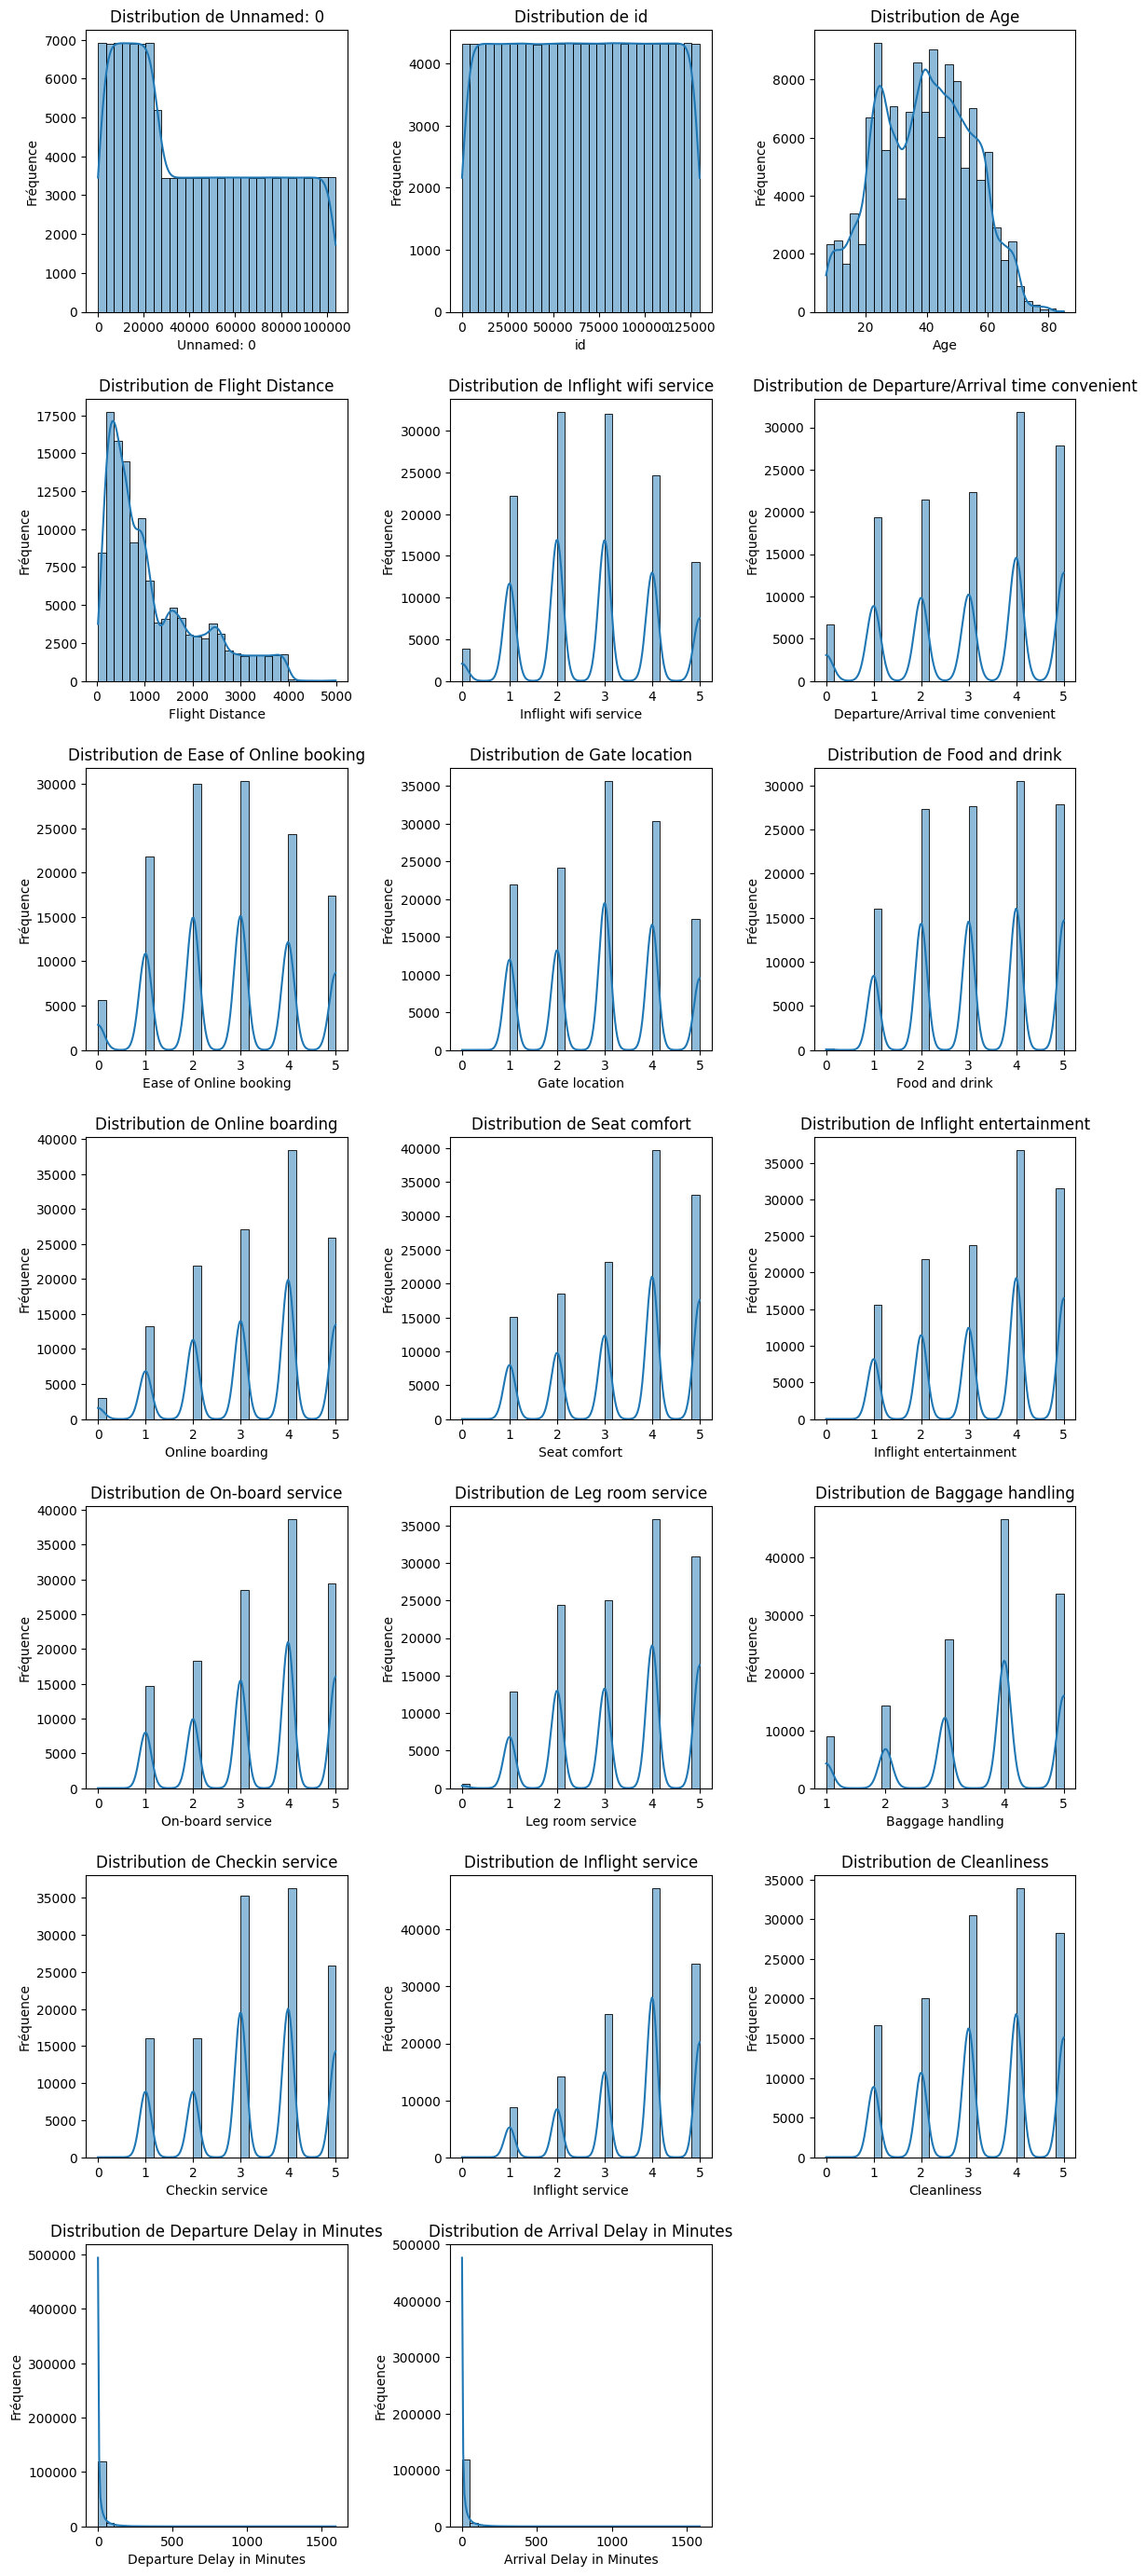

In [13]:
numerical_cols = df_clean_satisfaction.select_dtypes(include='number').columns.tolist()


num_vars = len(numerical_cols)
n_cols = 3  
n_rows = (num_vars // n_cols) + (num_vars % n_cols > 0)  # Nombre de lignes nécessaires

# 3. Visualisation des distributions des variables numériques
plt.figure(figsize=(12, 4 * n_rows)) 
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df_clean_satisfaction[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

# Ajustement des espacements pour éviter le chevauchement
plt.tight_layout(pad=2.0) 
plt.show()


###### On utilise le label encoder pour convertir les valeurs de la colonne 'satisfaction' 

In [14]:
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean_satisfaction['satisfaction'] = label_encoder.fit_transform(df_clean_satisfaction['satisfaction'])

C:\Users\nourn\AppData\Local\Temp\ipykernel_25496\2086528314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_satisfaction['satisfaction'] = label_encoder.fit_transform(df_clean_satisfaction['satisfaction'])


- ###### Matrice de corrélation

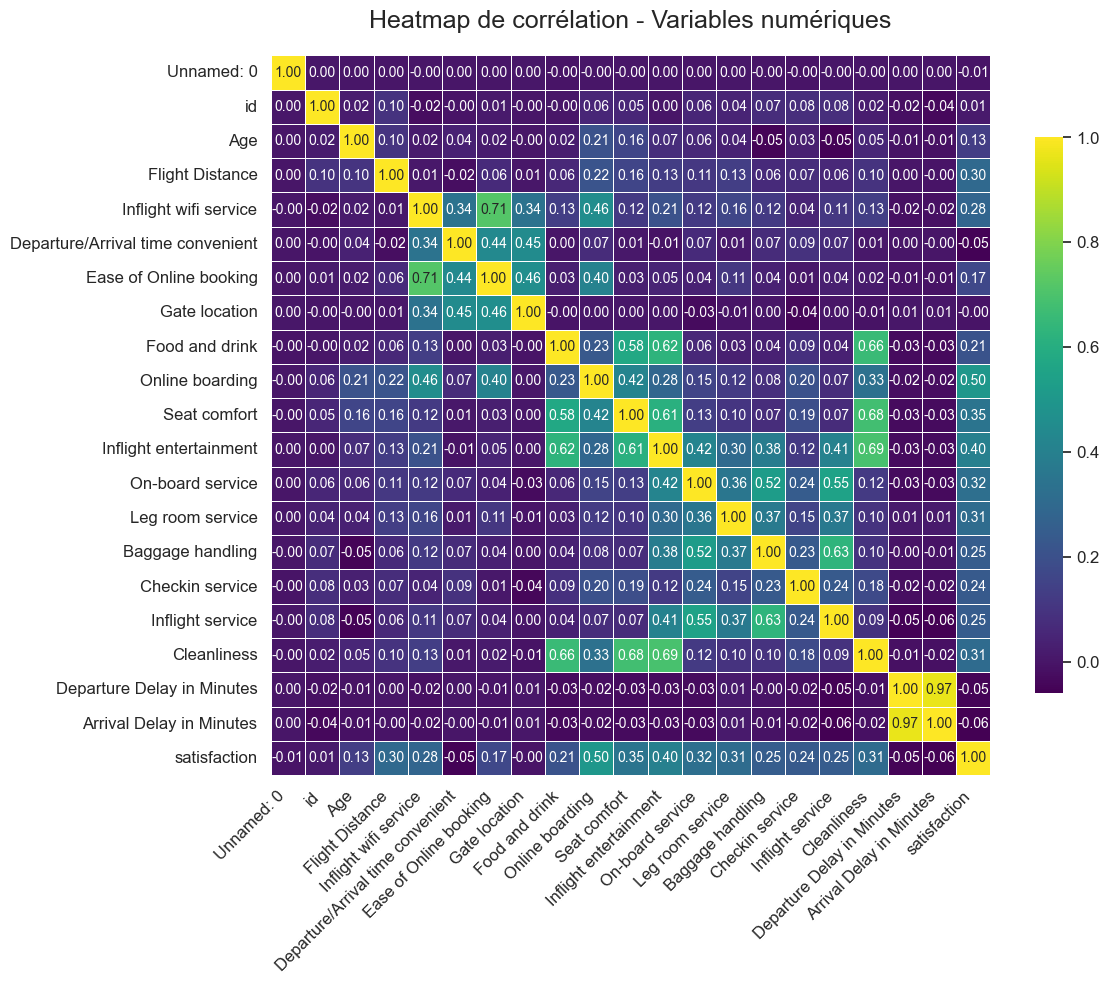

In [15]:
numerical_cols = df_clean_satisfaction.select_dtypes(include=['number']).columns
df_numerical = df_clean_satisfaction[numerical_cols] 
#2. Calcul de la matrice de corrélation
corr_matrix = df_numerical.corr()

# 3. Personnalisation de la heatmap
plt.figure(figsize=(12, 10)) 
sns.set(font_scale=1.1) 

# Créer la heatmap avec des annotations, une palette plus dynamique et un fond plus élégant
sns.heatmap(corr_matrix, 
            annot=True,         
            fmt=".2f",          
            cmap='viridis',    
            linewidths=0.5,     
            square=True,        
            cbar_kws={"shrink": .75},  
            annot_kws={"size": 10})    

# 4. Titre et ajustements esthétiques
plt.title('Heatmap de corrélation - Variables numériques', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)

# 5. Afficher la heatmap
plt.tight_layout()  # Ajuster automatiquement les marges
plt.show()

###### Corélation de Cramer's des variabbles numériques vis à vis de la variable 'satisfaction'

In [16]:
numerical_cols = df_clean_satisfaction.select_dtypes(include='number').columns.tolist()

C:\Users\nourn\AppData\Local\Temp\ipykernel_25496\448617494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Variable', y='Corrélation de Pearson', palette='coolwarm')


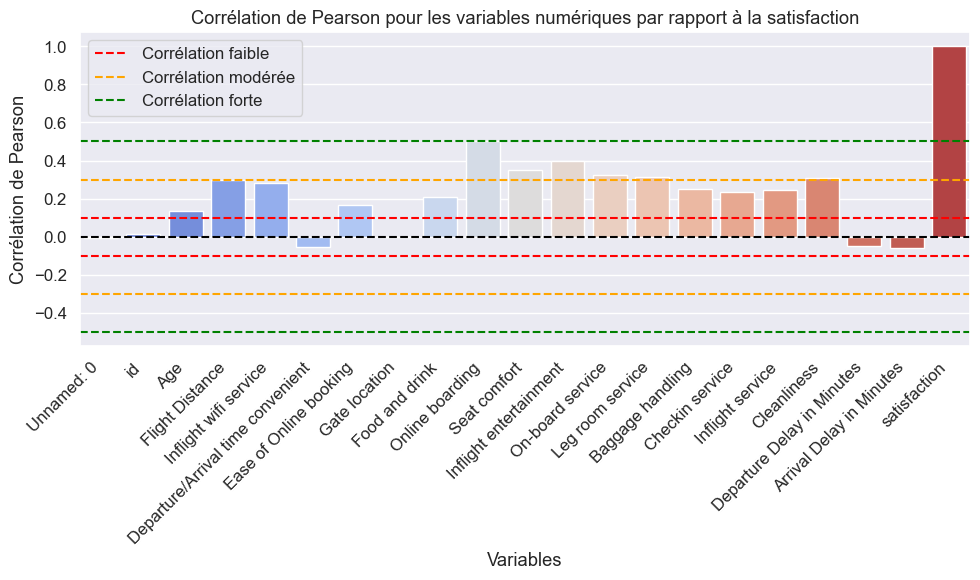

In [17]:
correlation_results = {}
for col in numerical_cols:
    correlation = df_clean_satisfaction[col].corr(df_clean_satisfaction['satisfaction'])
    correlation_results[col] = correlation

# Conversion des résultats en DataFrame pour la visualisation
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Corrélation de Pearson'])

# Visualisation
plt.figure(figsize=(10, 6), )
sns.barplot(data=correlation_df, x='Variable', y='Corrélation de Pearson', palette='coolwarm')
plt.title("Corrélation de Pearson pour les variables numériques par rapport à la satisfaction")
plt.xlabel("Variables")
plt.ylabel("Corrélation de Pearson")
plt.axhline(0, color='black', linestyle='--')  # Ligne de référence à 0
plt.axhline(0.1, color='red', linestyle='--', label='Corrélation faible')
plt.axhline(0.3, color='orange', linestyle='--', label='Corrélation modérée')
plt.axhline(0.5, color='green', linestyle='--', label='Corrélation forte')
plt.axhline(-0.1, color='red', linestyle='--')
plt.axhline(-0.3, color='orange', linestyle='--')  # Corrélation négative modérée
plt.axhline(-0.5, color='green', linestyle='--')  # Corrélation négative forte
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de 45 degrés
plt.legend()
plt.tight_layout()
plt.show()

###### Corélation de Cramer's des variabbles catégoriques vis à vis de la variable 'satisfaction'

Variable: Gender - Cramér's V: 0.01
Variable: Customer Type - Cramér's V: 0.19
Variable: Type of Travel - Cramér's V: 0.45
Variable: Class - Cramér's V: 0.50


C:\Users\nourn\AppData\Local\Temp\ipykernel_25496\1687223762.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Variable', y="Cramér's V", palette='coolwarm')  # Utilisation de la palette coolwarm


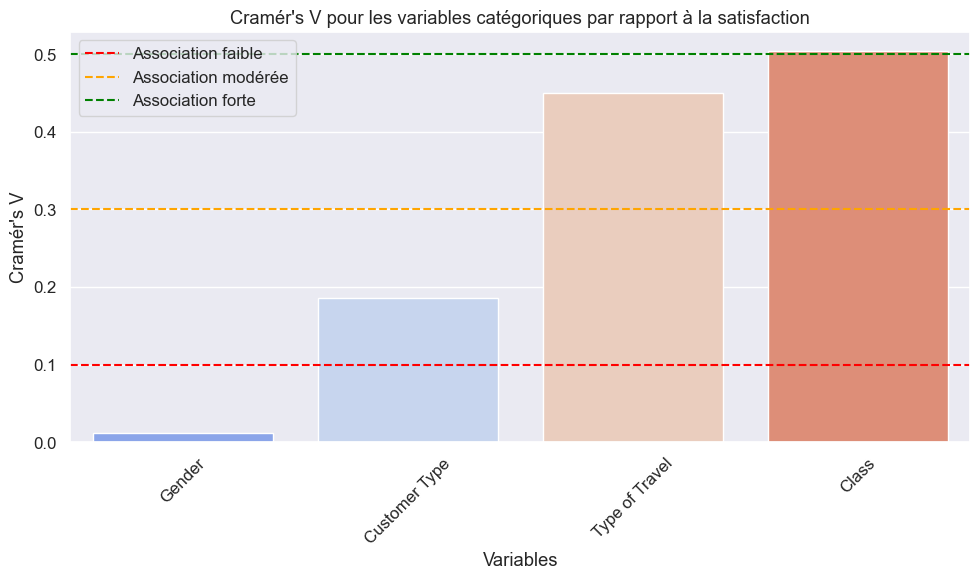

In [18]:
categorical_cols = df_clean_satisfaction.select_dtypes(exclude='number').columns.tolist()

# Fonction pour calculer le Cramér's V
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


# Calcul du Cramér's V pour chaque variable catégorique par rapport à 'satisfaction'
results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df_clean_satisfaction[col], df_clean_satisfaction['satisfaction'])
    v = cramers_v(contingency_table)
    results[col] = v
    print(f"Variable: {col} - Cramér's V: {v:.2f}")

# Conversion des résultats en DataFrame pour la visualisation
results_df = pd.DataFrame(list(results.items()), columns=['Variable', "Cramér's V"])

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Variable', y="Cramér's V", palette='coolwarm')  # Utilisation de la palette coolwarm
plt.title("Cramér's V pour les variables catégoriques par rapport à la satisfaction")
plt.xlabel("Variables")
plt.ylabel("Cramér's V")
plt.xticks(rotation=45)
plt.axhline(0.1, color='red', linestyle='--', label='Association faible')
plt.axhline(0.3, color='orange', linestyle='--', label='Association modérée')
plt.axhline(0.5, color='green', linestyle='--', label='Association forte')
plt.legend()
plt.tight_layout()
plt.show()


###### Aperçu global du dataset

Feature: Unnamed: 0                          |▍         | [  4%]   00:00 -> (00:05 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

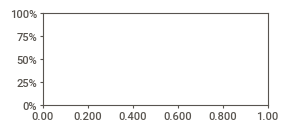

In [19]:
import sweetviz as sv
rapport = sv.analyze(df_clean_satisfaction)
rapport.show_html('rapport_EDA.html') 